# Лабораторная работа №2

Выполнил: Владимир Ульяницкий

In [4]:
#Рассматриваемая функция
from math import * 
def f(x):
  return e**x - 3*x**2*sin(10*x)*cos(5*x)

In [5]:
#Реализация функции для построения графиков
def f_np(x):
  return e**x - 3*x**2*np.sin(10*x)*np.cos(5*x)

In [6]:
#Для графиков(и немного для нецелочисленных диапазонов)
import numpy as np
import matplotlib.pyplot as plt

Построим графики для f(x):

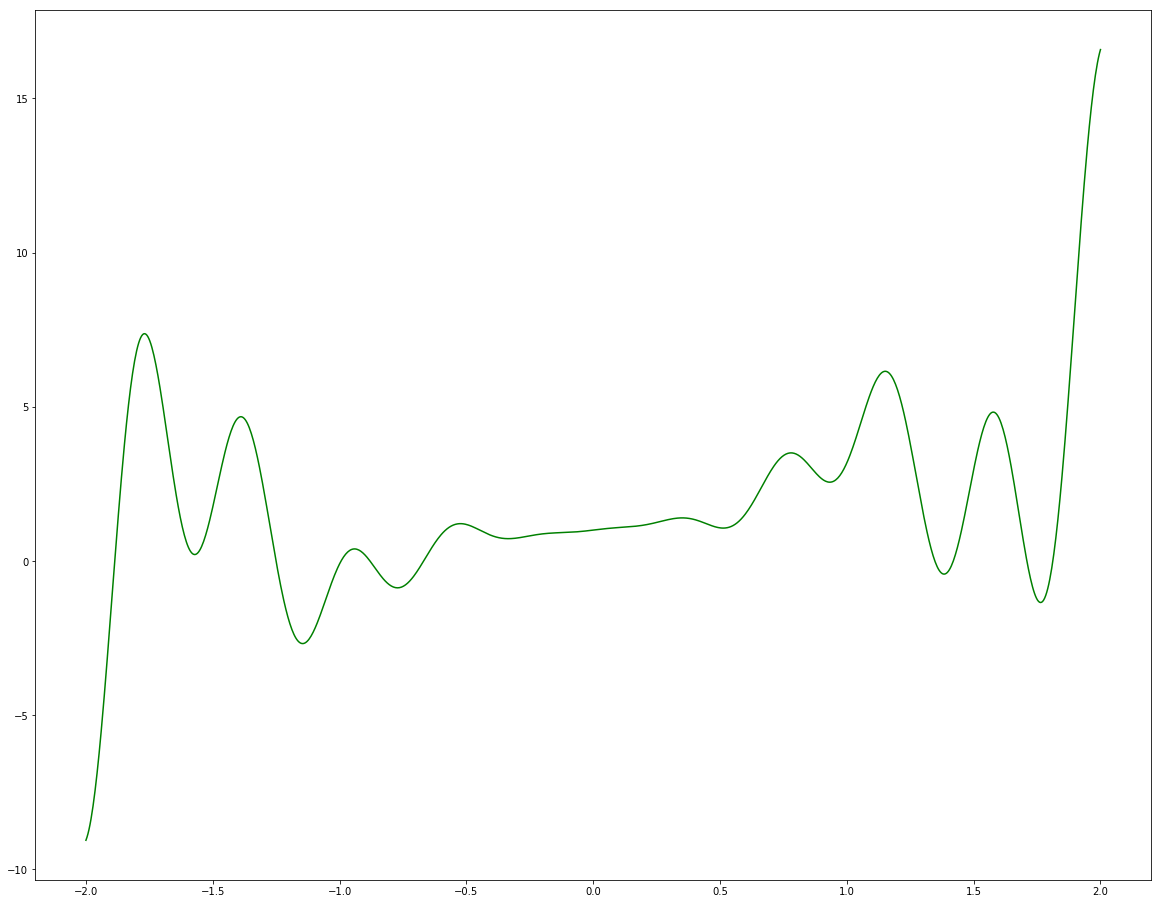

In [7]:
#Здесь и далее зелёный график - наша функция, синий - её приближение  
rr = np.arange(-2, 2+1e-3, 4*1e-3)
table = [[0 for x in range (7)] for y in range (10)]
for i in range(0, 10, 1):
  table[i][0] = 10*(i+1)
plt.figure(figsize=(20, 16))
plt.plot(rr, f_np(rr), color='green')
plt.show()

### Пункт 1: Многочлен Ньютона по равноотстоящим узлам

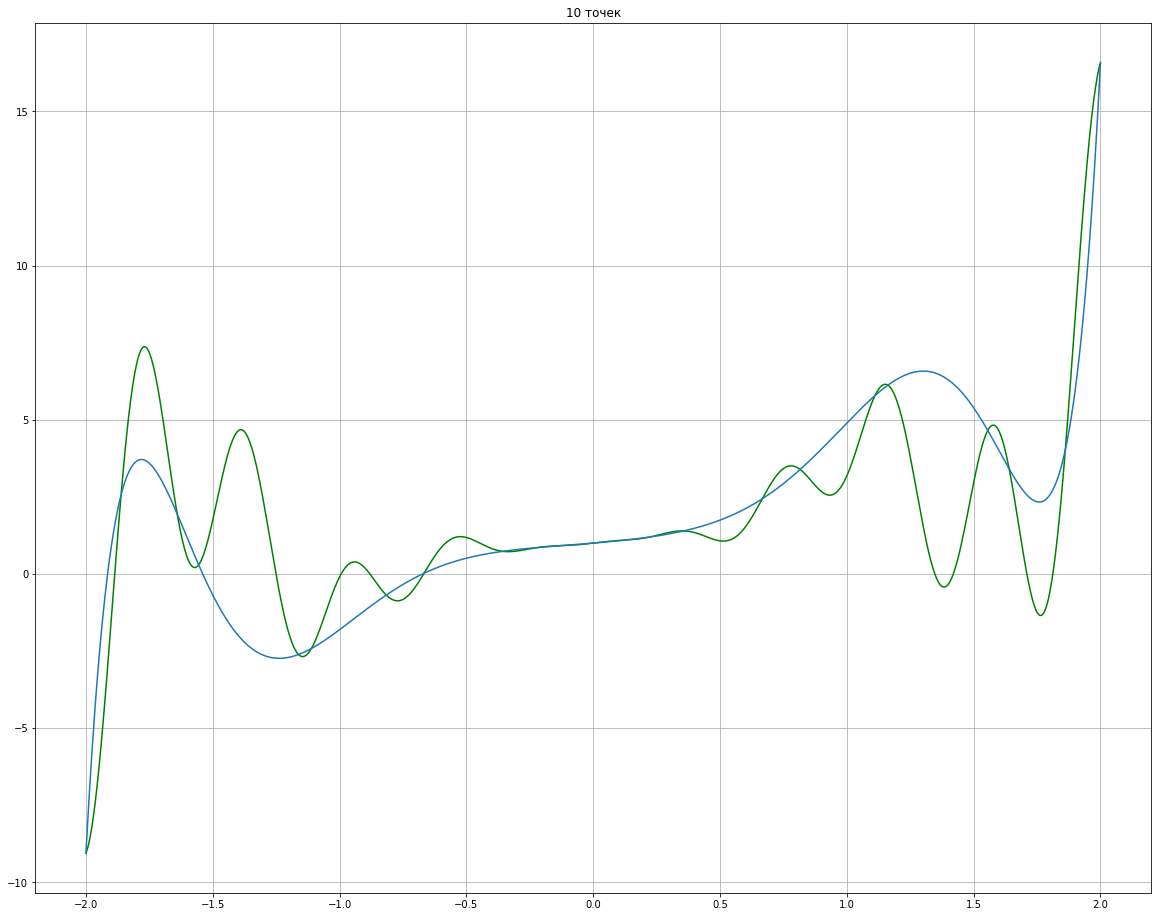

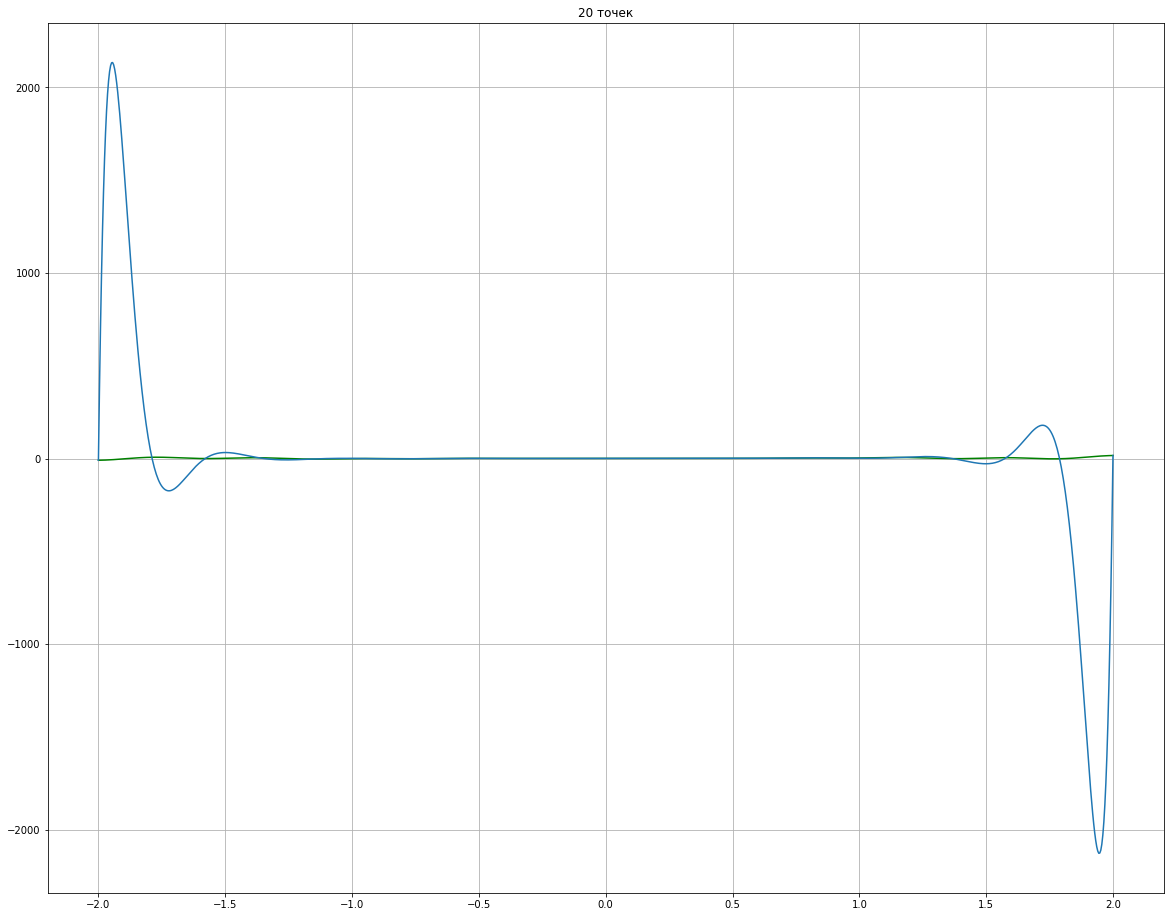

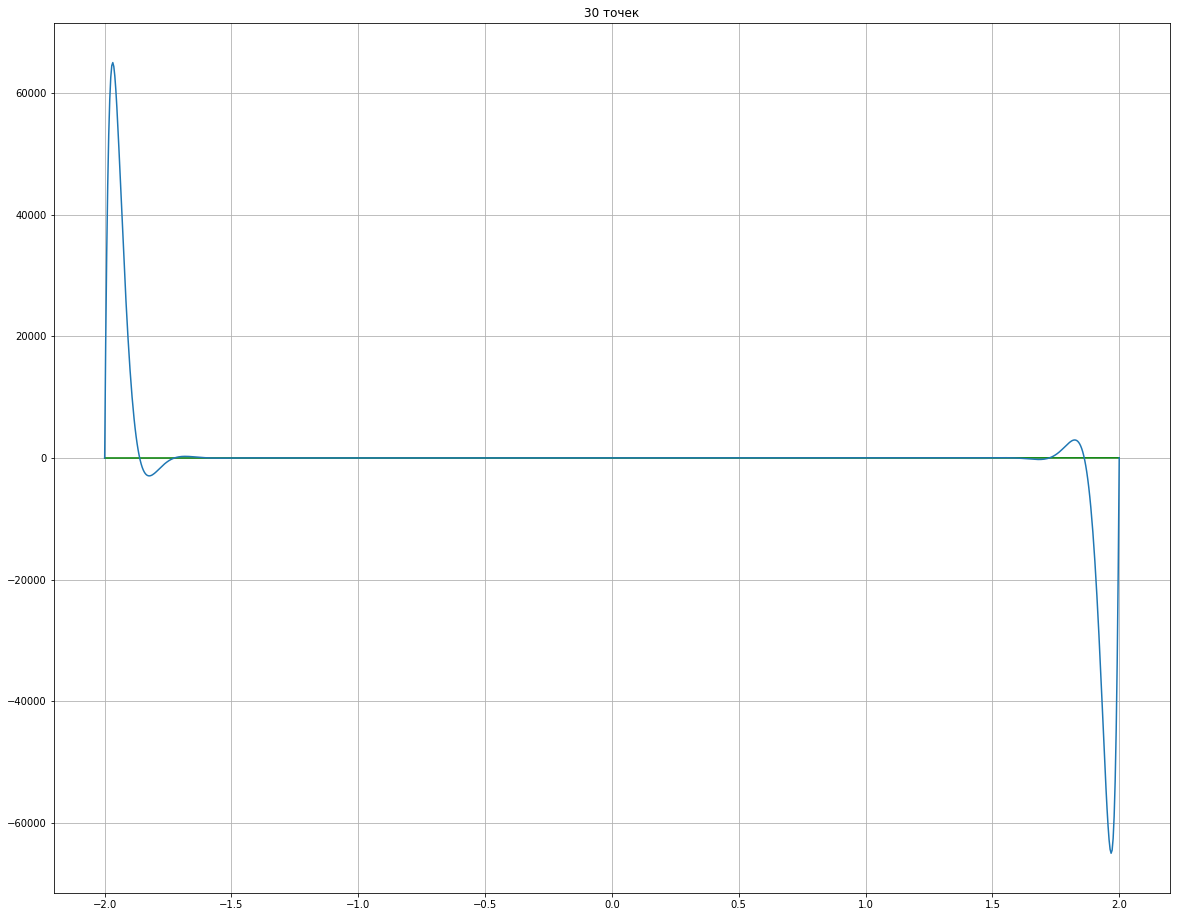

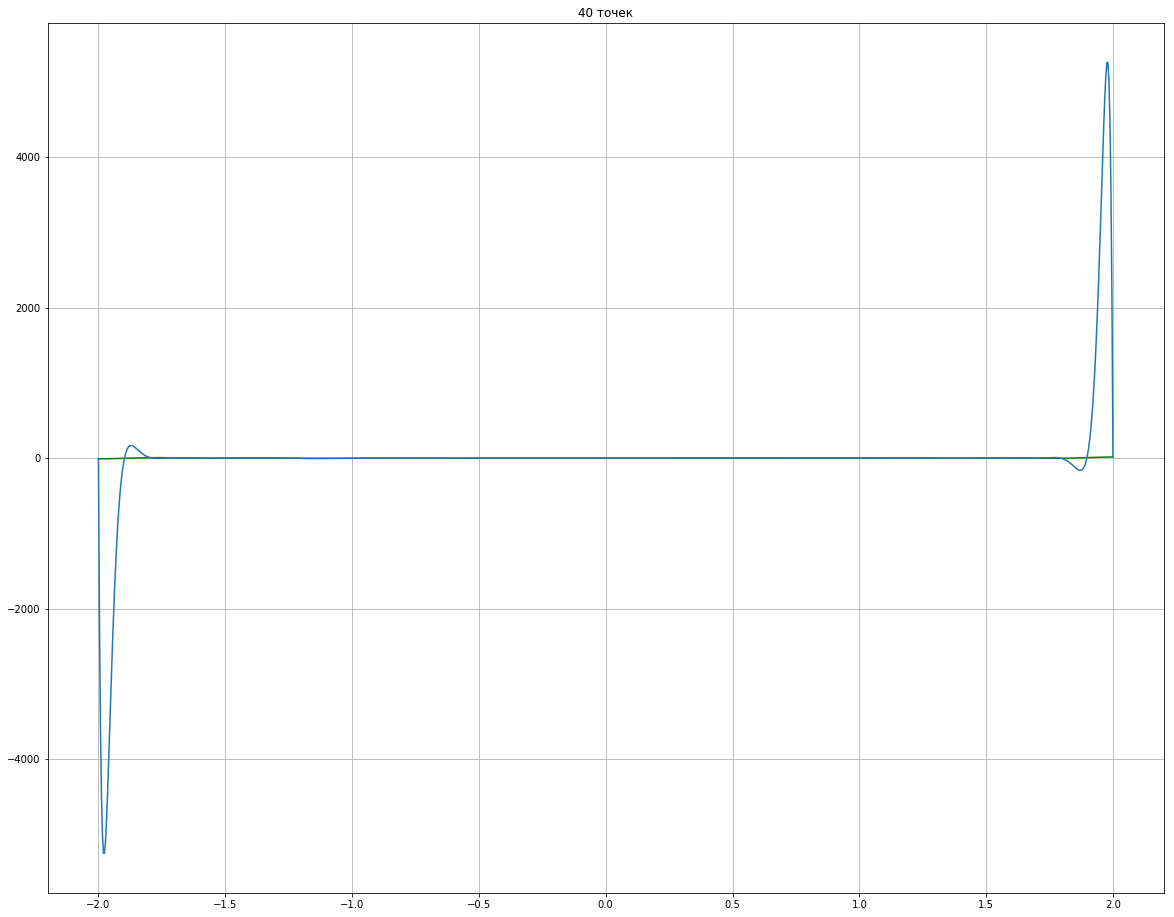

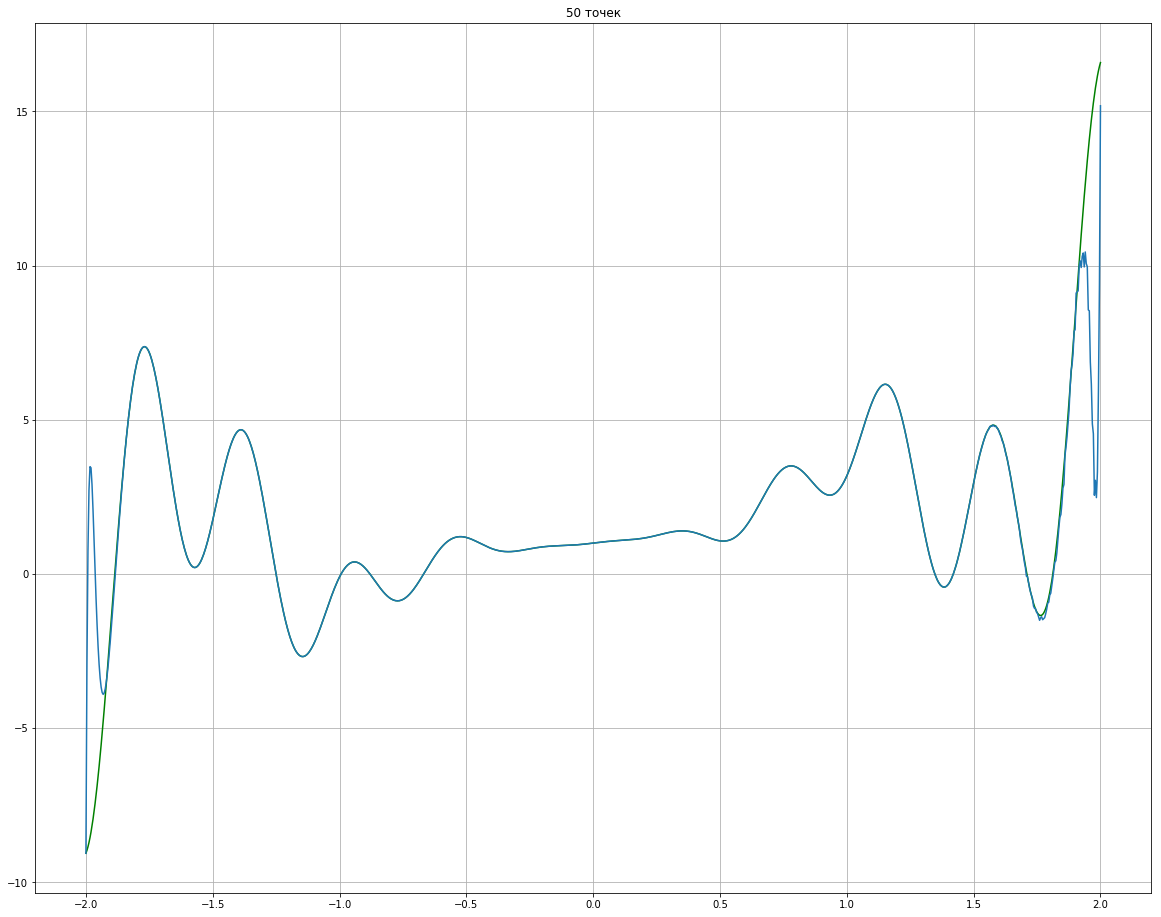

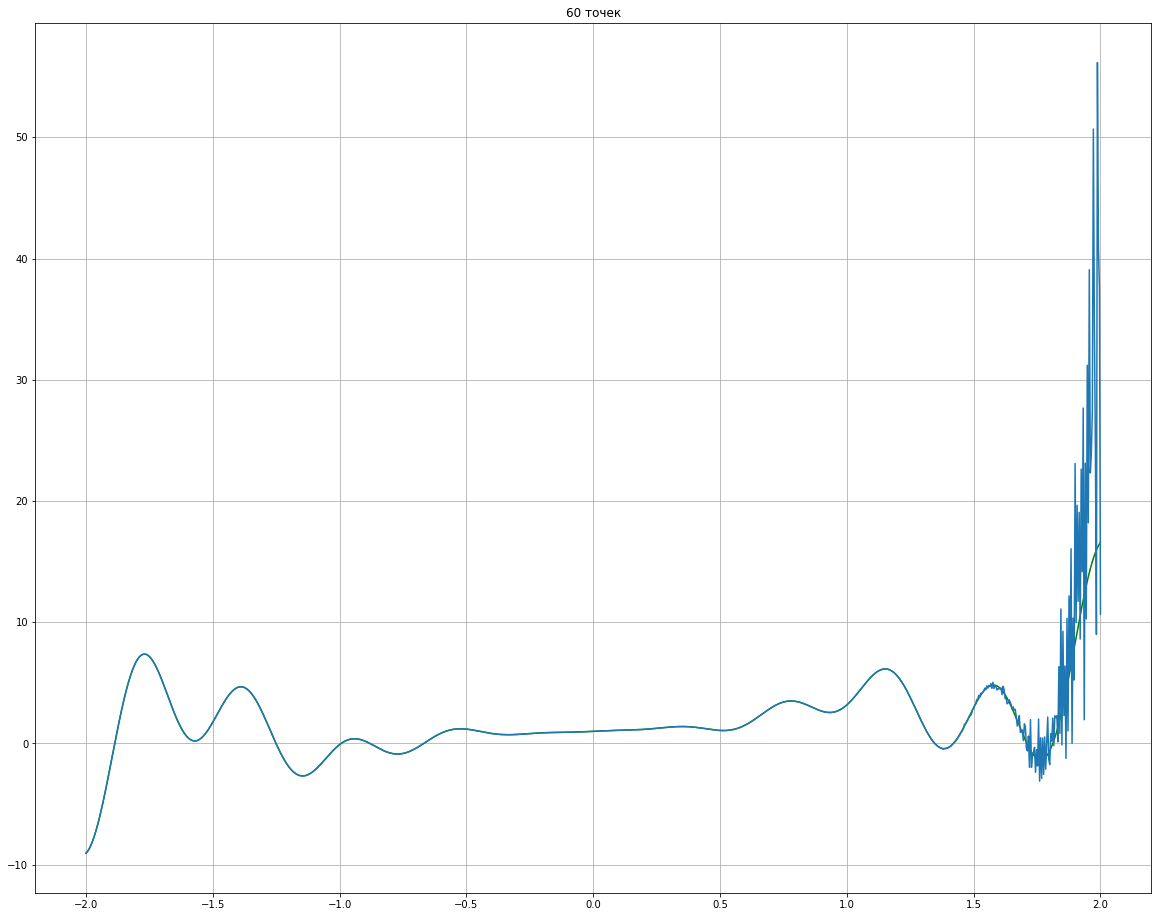

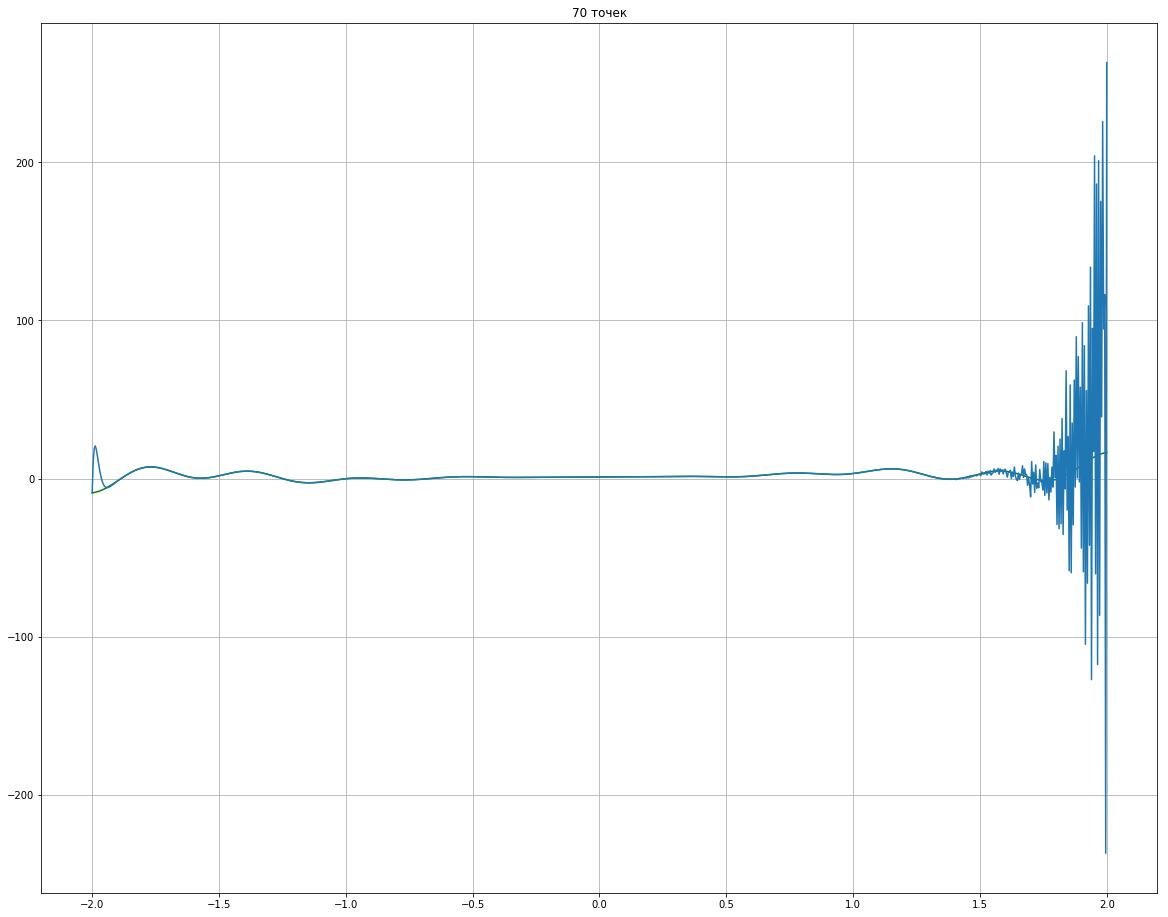

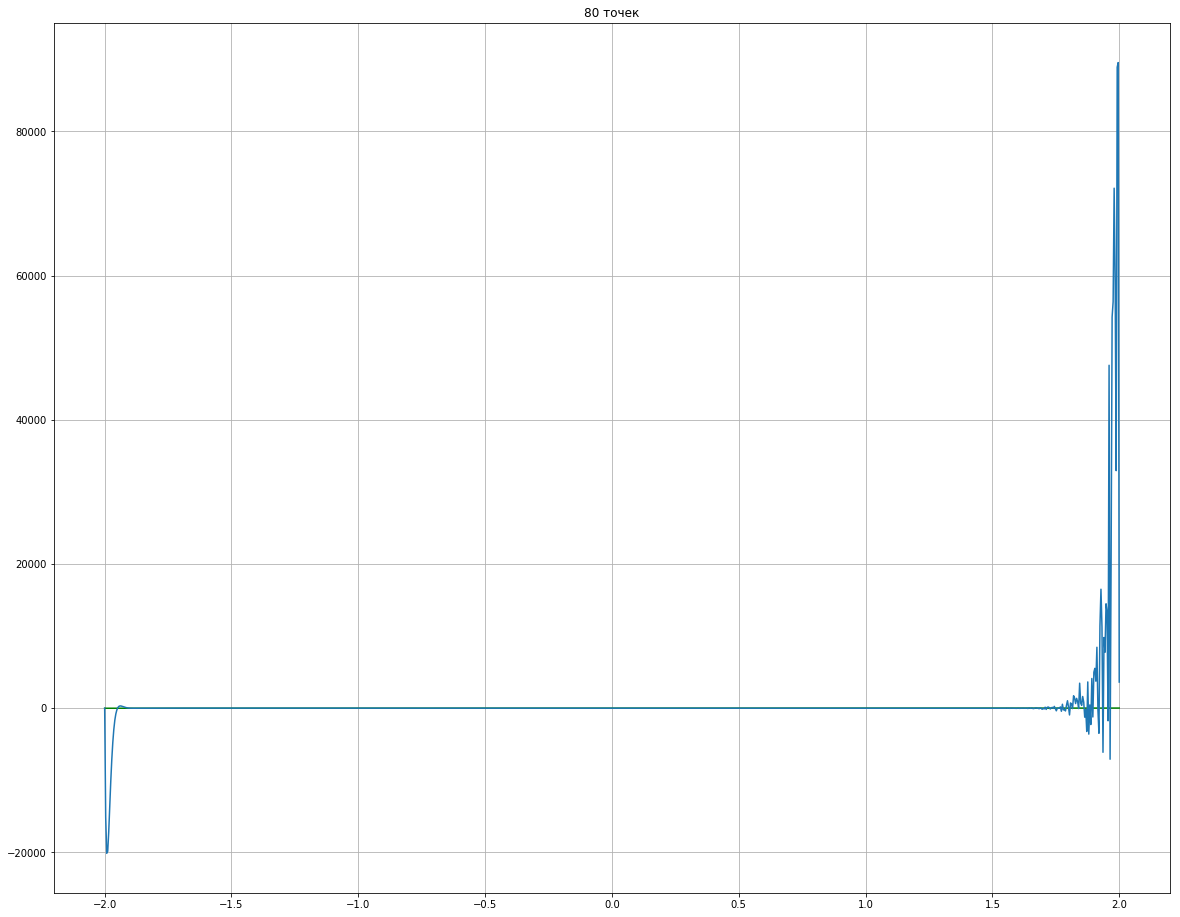

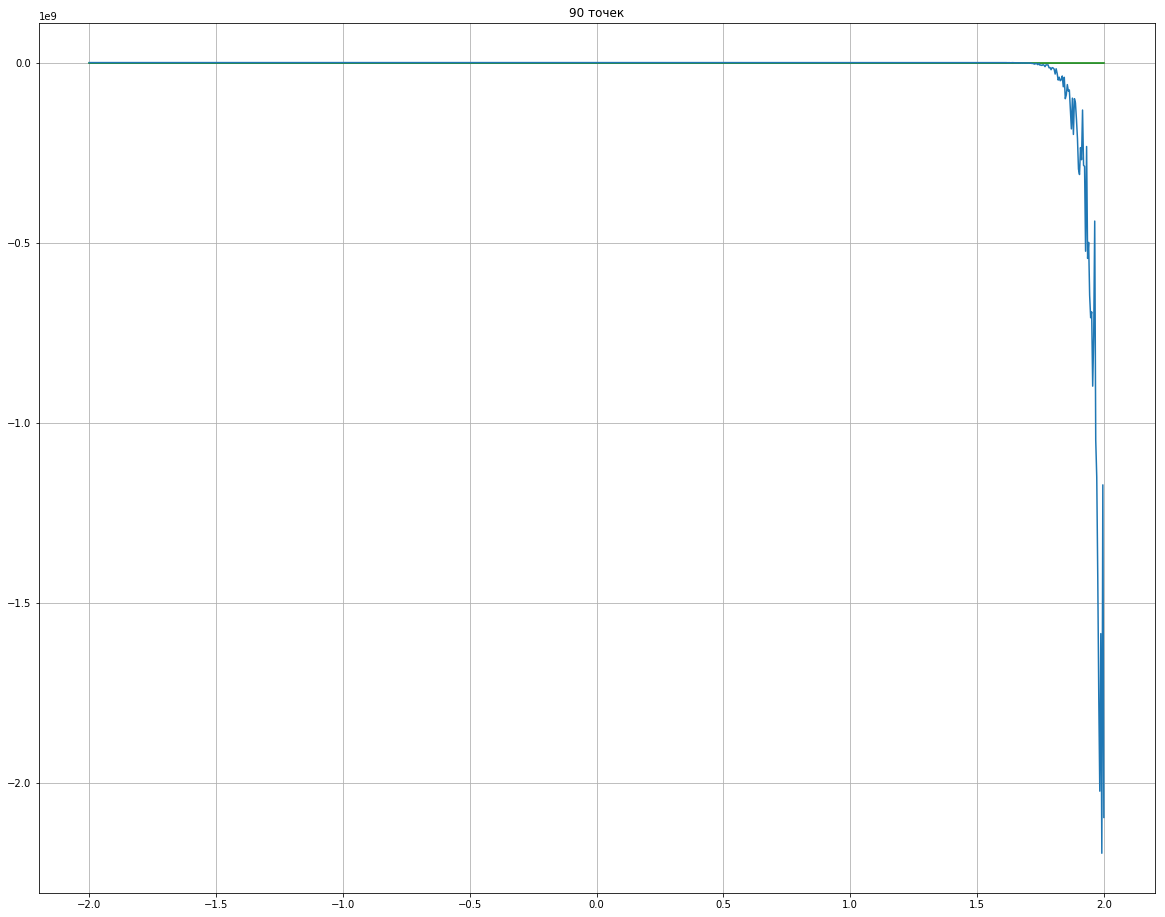

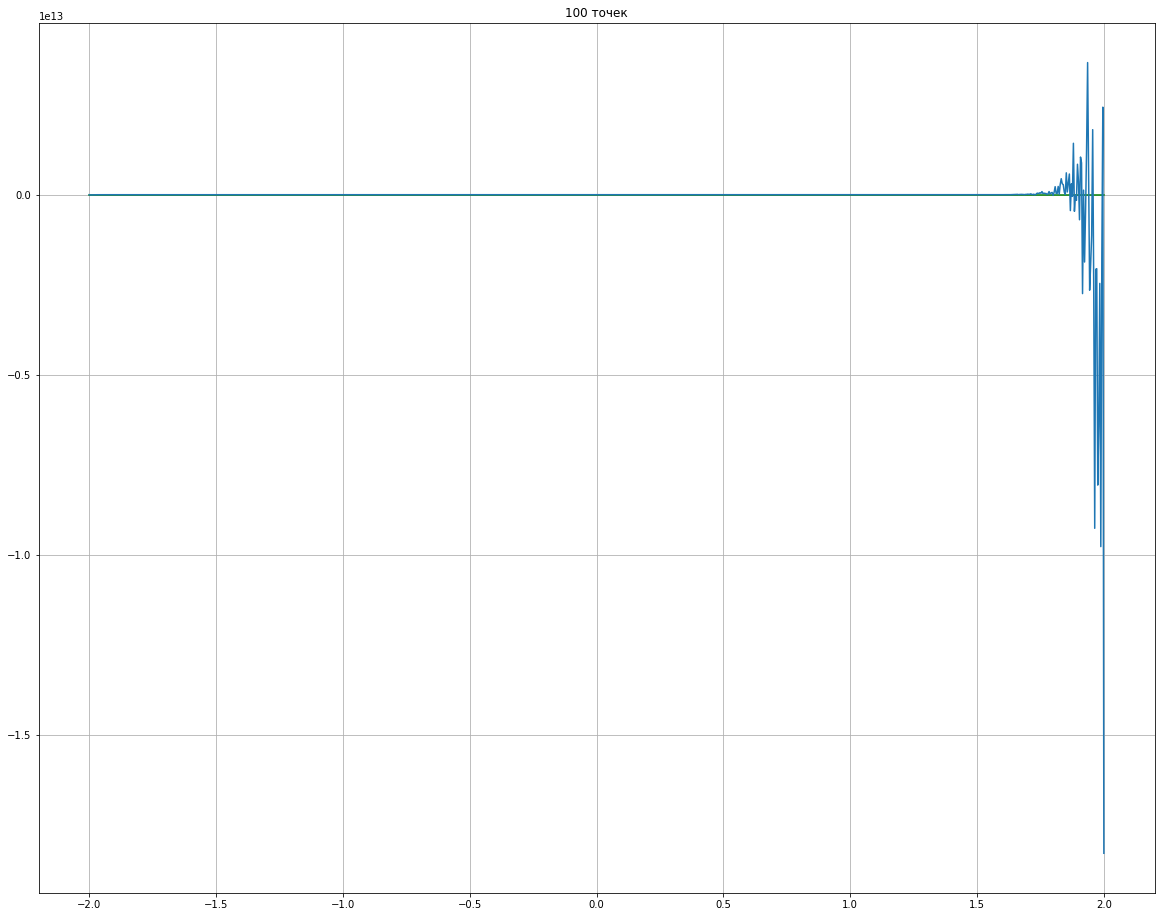

In [8]:
#Подсчёт коэффициентов для многочлена Ньютона
def coef(x, y): 
    n = len(x) 
    a = [] 
    for i in range(n): 
      a.append(y[i]) 
    for j in range(1, n):
      for i in range(n-1, j-1, -1):
        a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])
    return a
  
#Подсчёт значения многочлена с заданными коэффициентами
def eval(a, x, r): 
    n = len(a) - 1 
    temp = a[n] 
    for i in range(n - 1, -1, -1): 
      temp = temp * (r - x[i]) + a[i] 
    return temp

#10i равноотстоящих узлов

import time
for i in range (0, 10, 1):
  start_time=time.time()
  xs_i_nwt=[]
  ys_i_nwt=[]
  for j in np.arange(-2, 2+2/(10*i+9), 4/(10*i+9)):
    xs_i_nwt.append(j)
    ys_i_nwt.append(f(j))
  arr_i_nwt=coef(xs_i_nwt, ys_i_nwt)
  table[i][2]=(time.time() - start_time)*10e3
  
  plt.figure(figsize=(20, 16))
  plt.title(str(10 *(i+1)) + ' точек')
  plt.plot(rr, f_np(rr), color='green')
  plt.plot(rr, list(map(lambda i : eval(arr_i_nwt, xs_i_nwt, i), rr)))
  plt.grid()
  plt.show()
  
  table[i][1]=max(list(map(lambda i : abs(f(i)-eval(arr_i_nwt, xs_i_nwt, i)), rr)))

Вывод: интерполирование по равностоящим узлам иногда может приводить к плохим результатам

### Пункт 2: Многочлен Ньютона по Чебышевским узлам

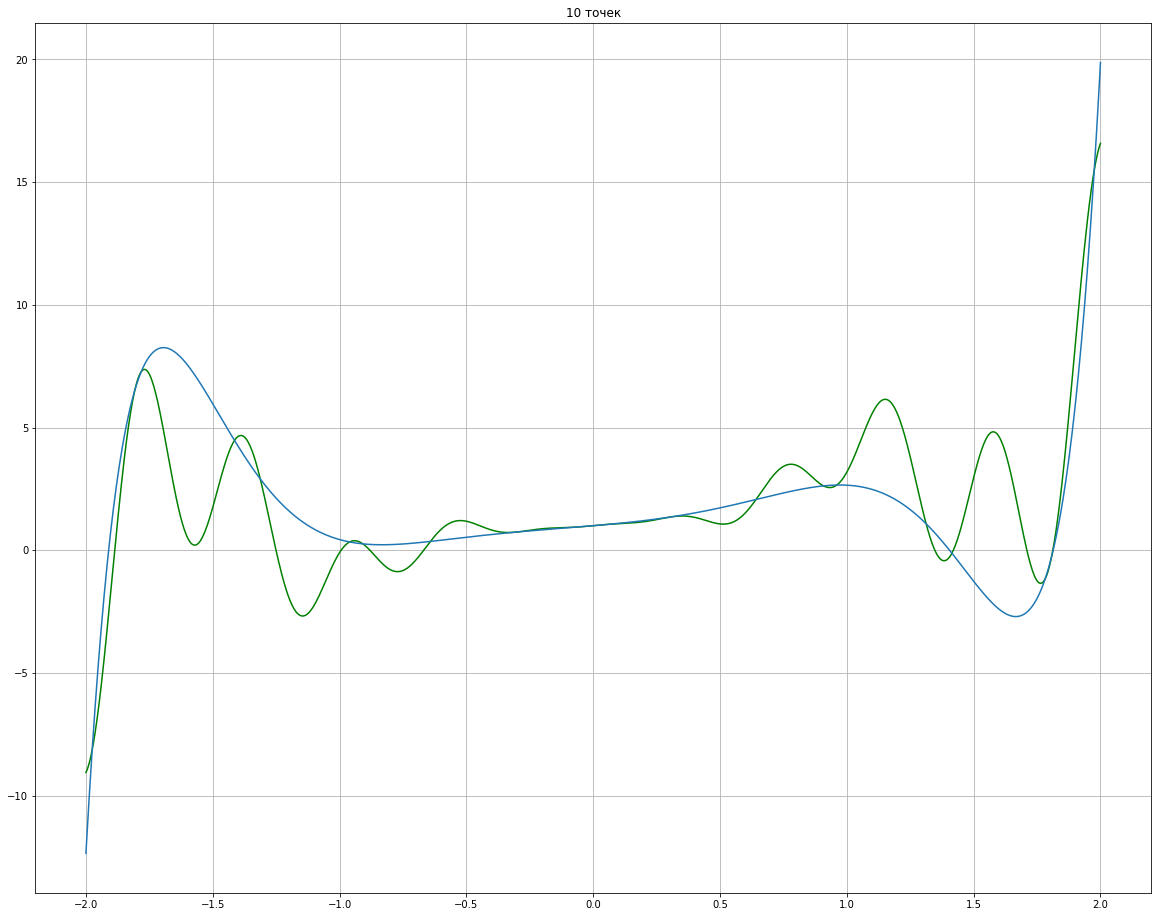

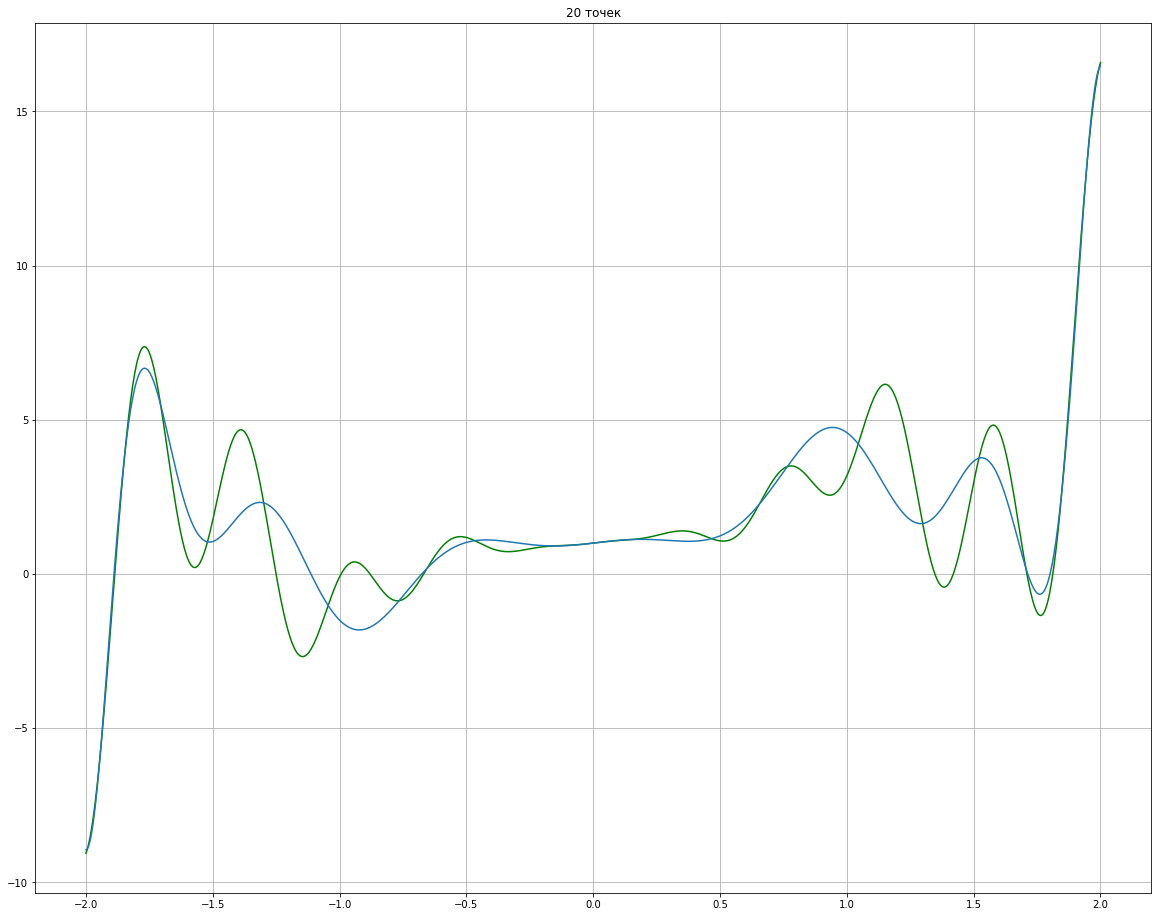

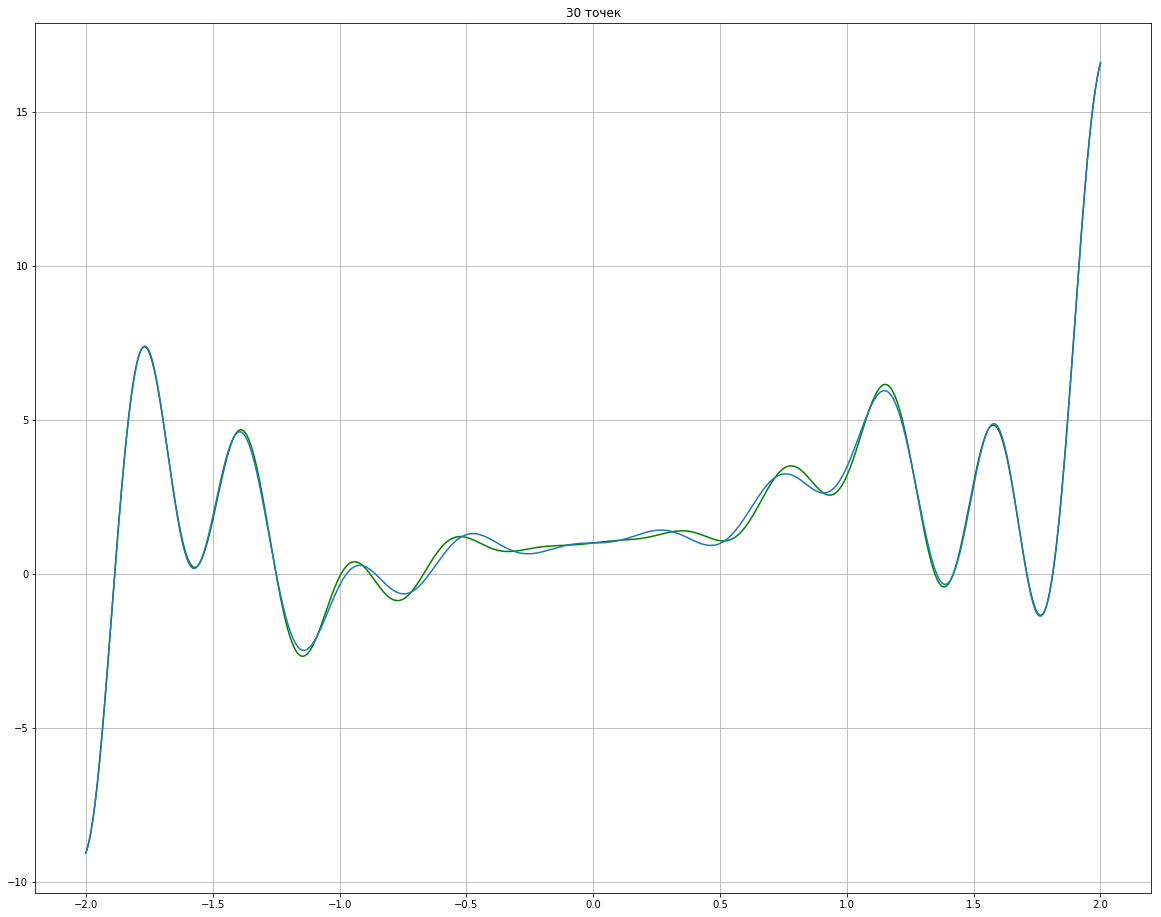

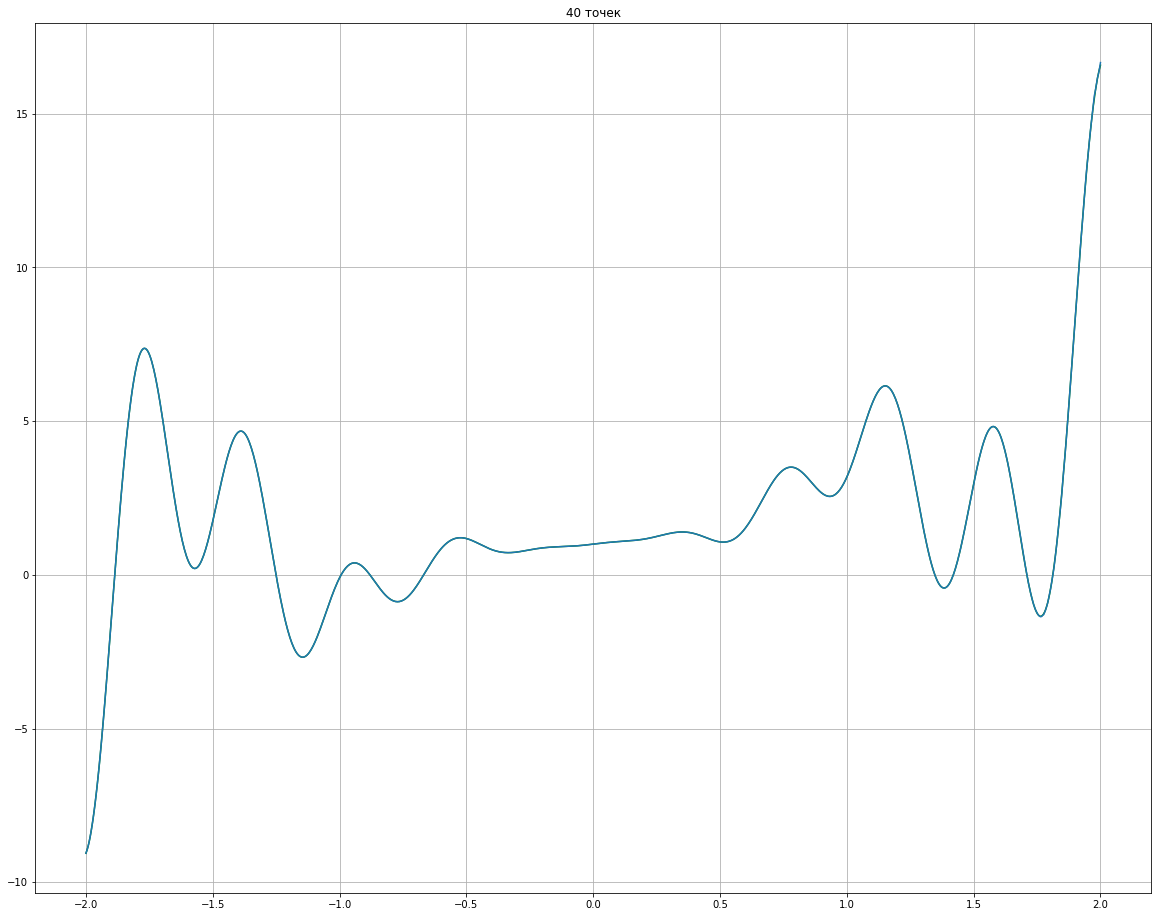

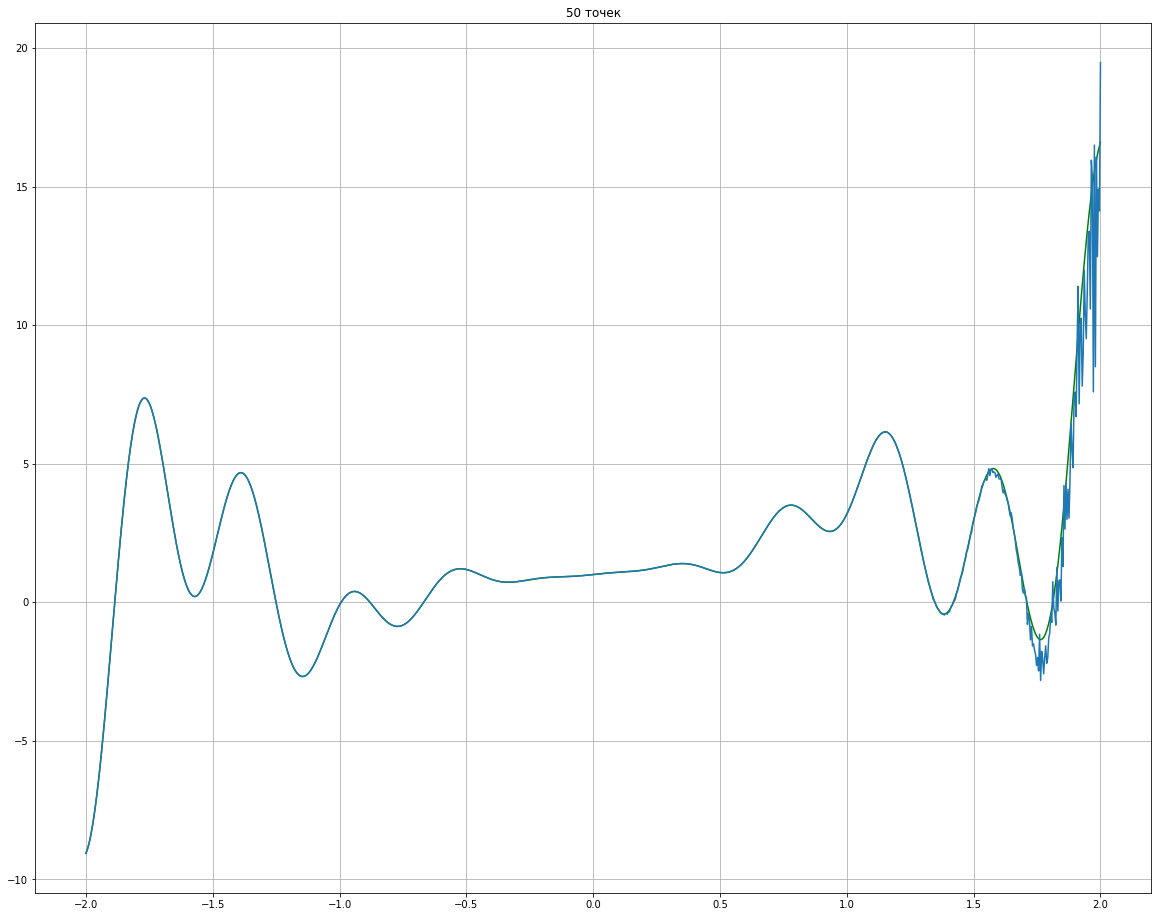

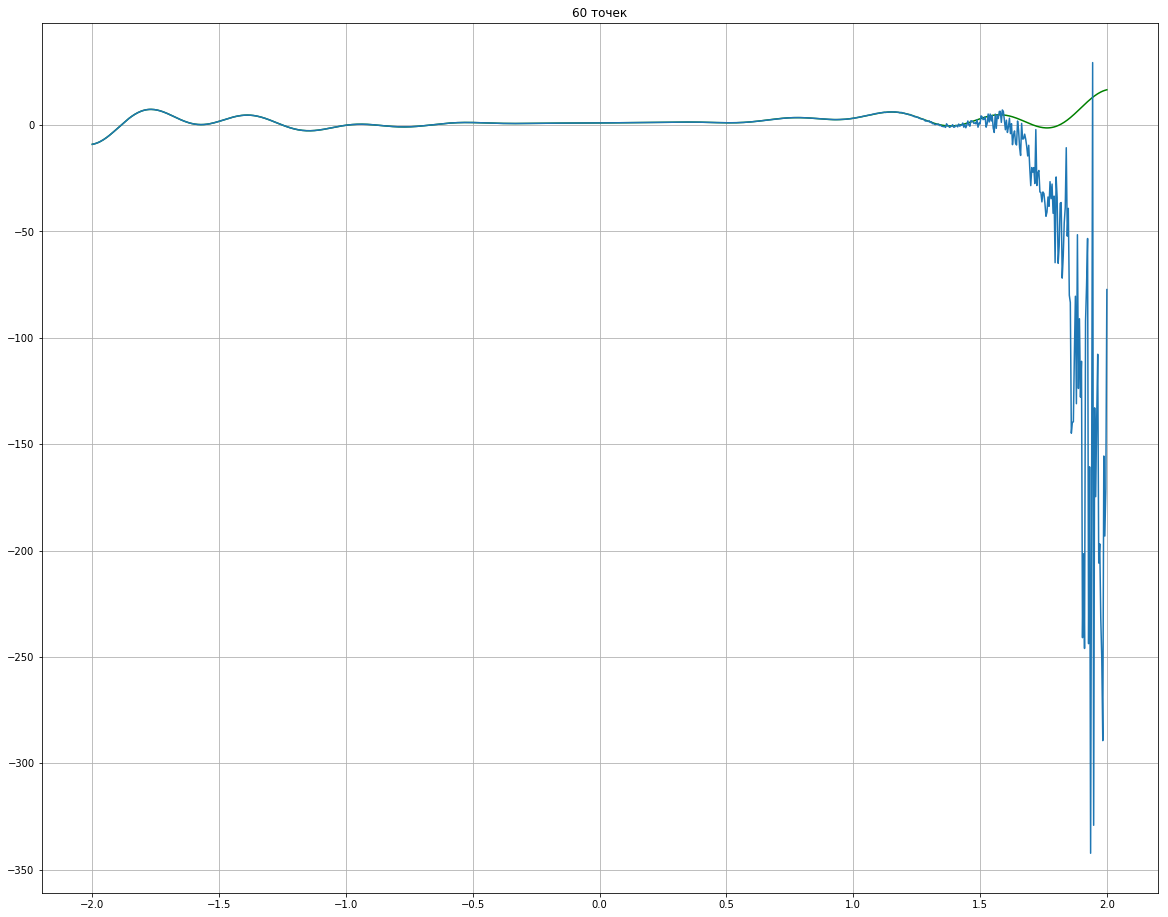

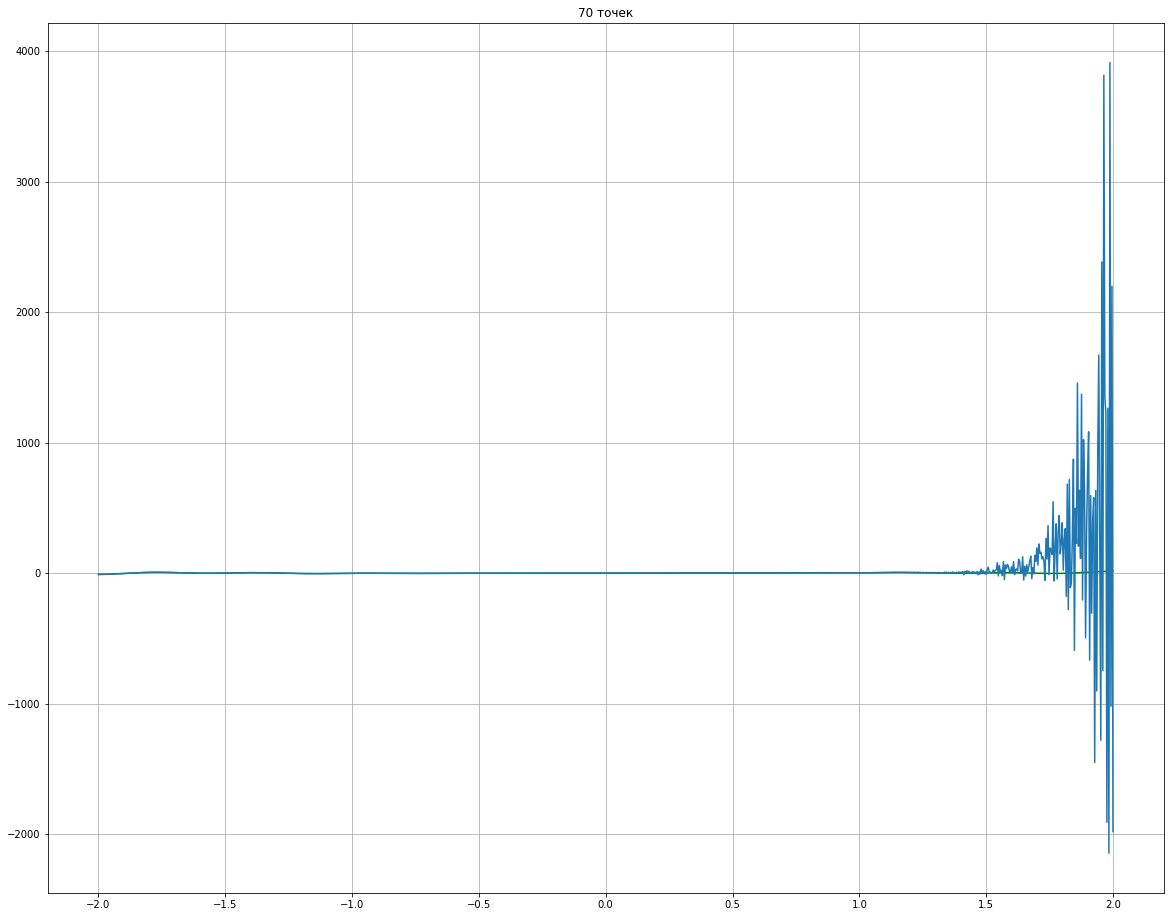

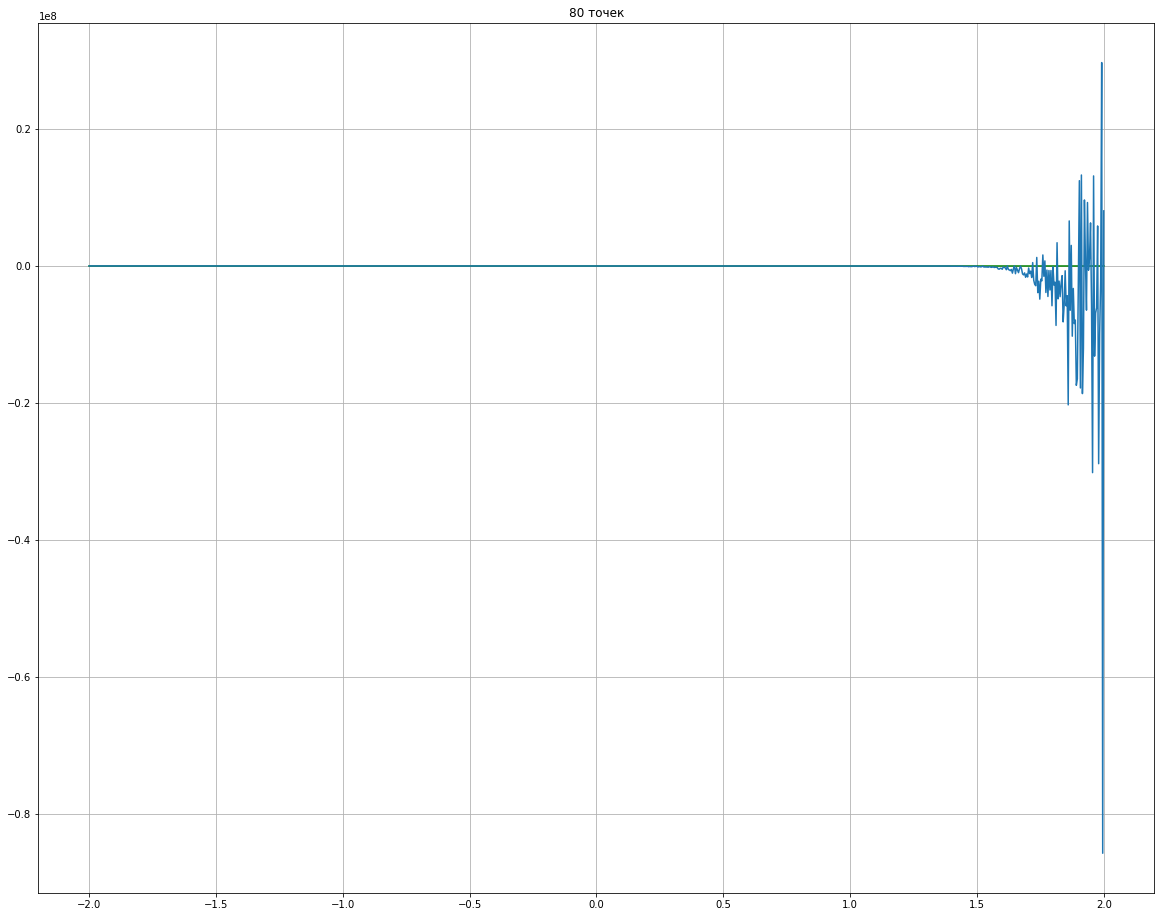

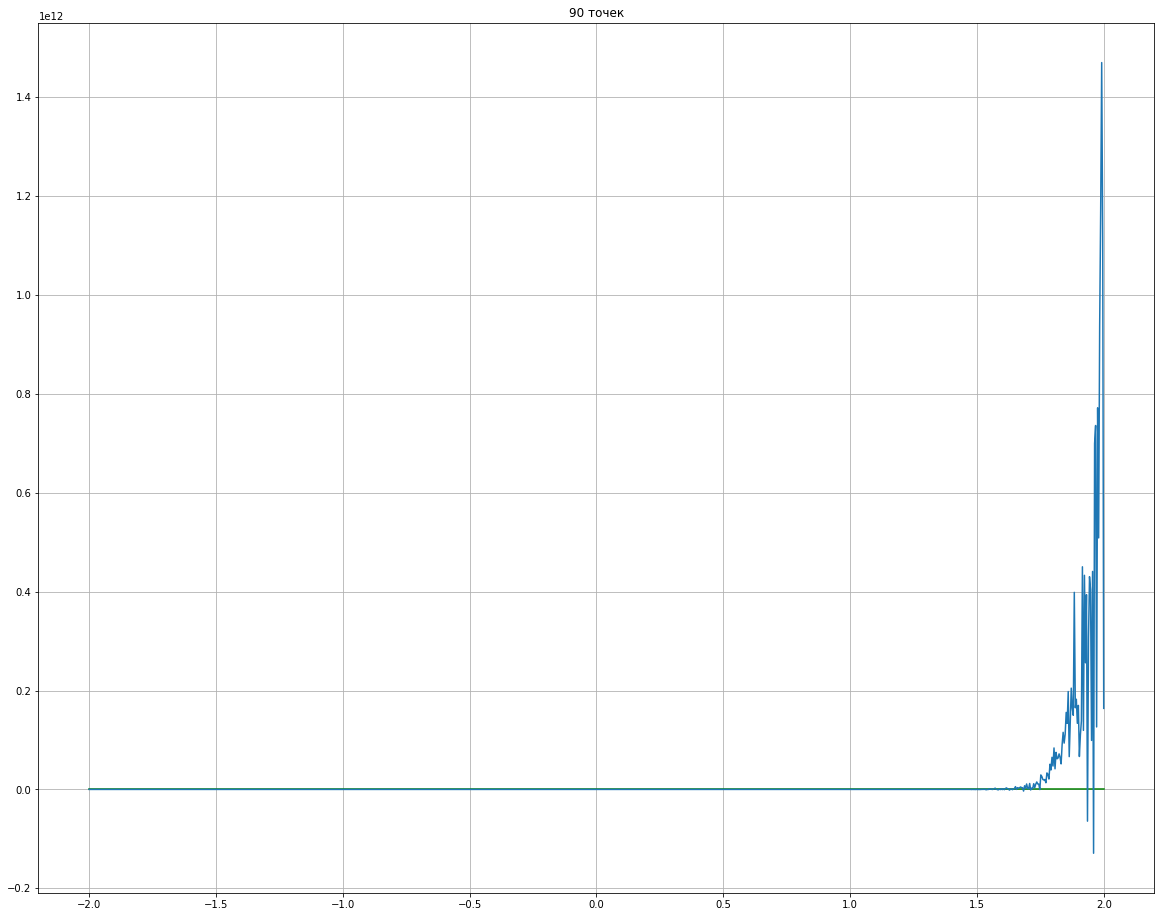

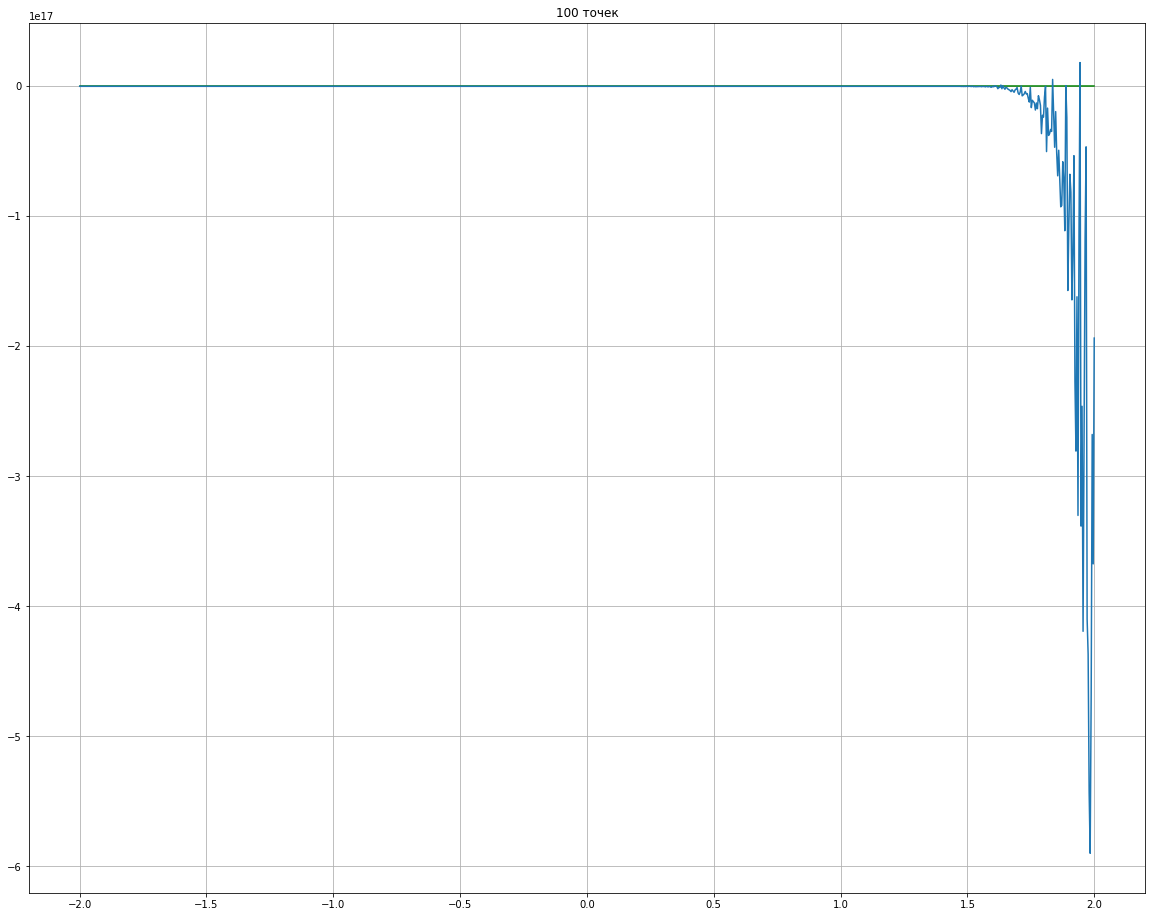

In [9]:
#Нахождение n узлов Чебышева на отрезке [a, b]
def chebyshev_newton(a, b, n):
  xs=[]
  for k in range(1, n+1):
    xs.append(0.5*(a+b)+0.5*(b-a)*cos((2*k-1)*pi/(2*n)))
  return sorted(xs)

#10i узлов Чебышева
for i in range (0, 10, 1):
  start_time=time.time()
  xs_i_nwt_cheb=chebyshev_newton(-2, 2, 10*(i+1))
  ys_i_nwt_cheb=list(map(lambda i: f(i), xs_i_nwt_cheb))
  arr_i_nwt_cheb=coef(xs_i_nwt_cheb, ys_i_nwt_cheb)
  table[i][4]=(time.time() - start_time)*10e3
  
  plt.figure(figsize=(20,16))
  plt.title(str(10 *(i+1)) + ' точек')
  plt.plot(rr, f_np(rr), color='green')
  plt.plot(rr, list(map(lambda i : eval(arr_i_nwt_cheb, xs_i_nwt_cheb, i), rr)))
  plt.grid()
  plt.show()
  
  table[i][3]=max(list(map(lambda i : abs(f(i)-eval(arr_i_nwt_cheb, xs_i_nwt_cheb, i)), rr)))

Вывод: Если выбирать не слишком много узлов Чебышева, то всё отлично интерполируется

### Пункт 3: Кубический сплайн по равноотстоящим узлам

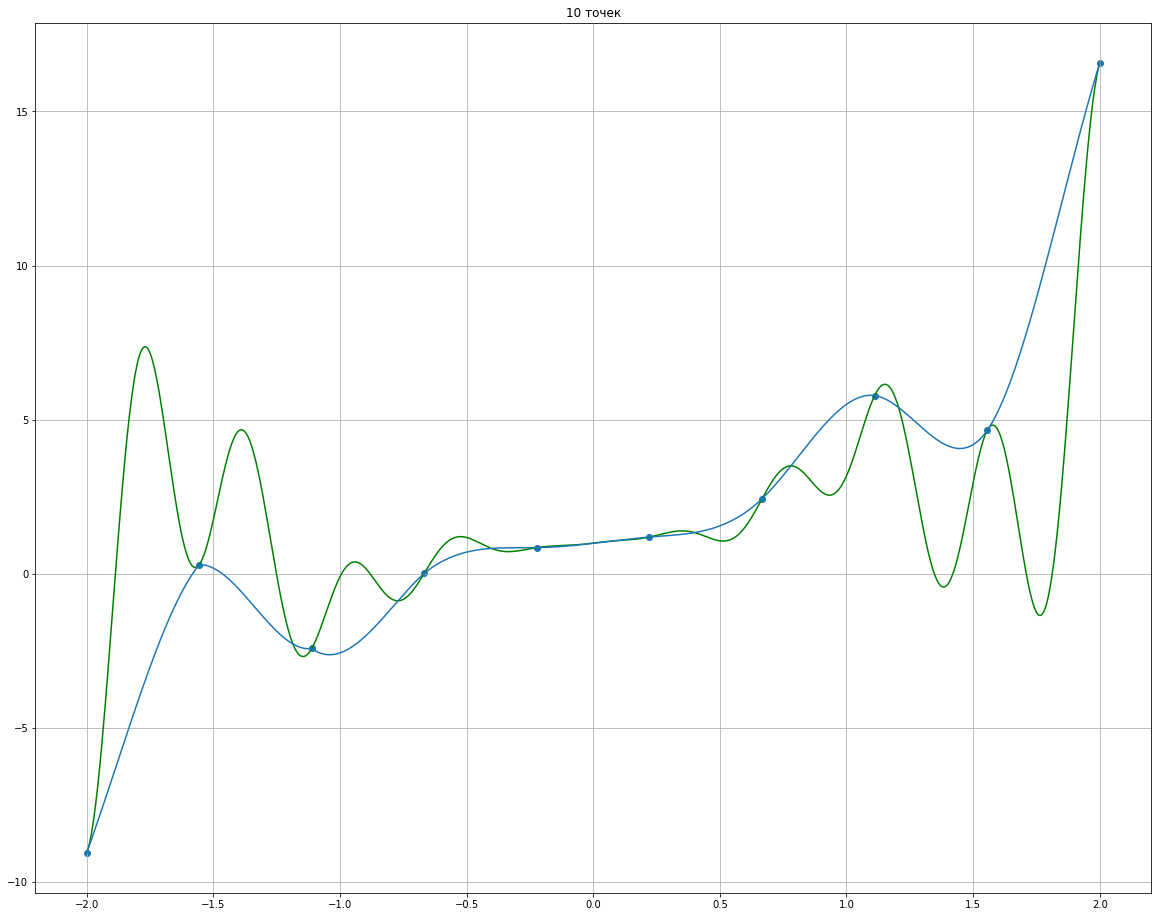

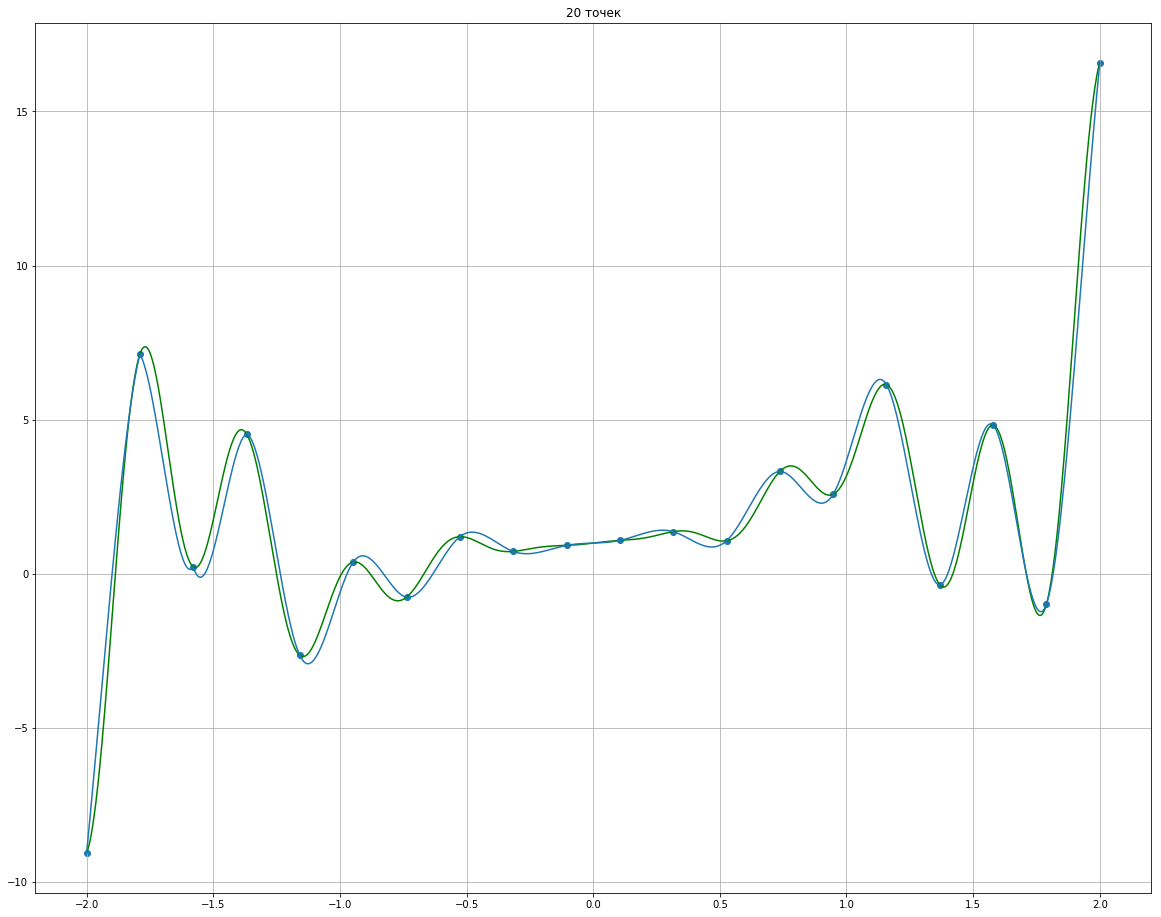

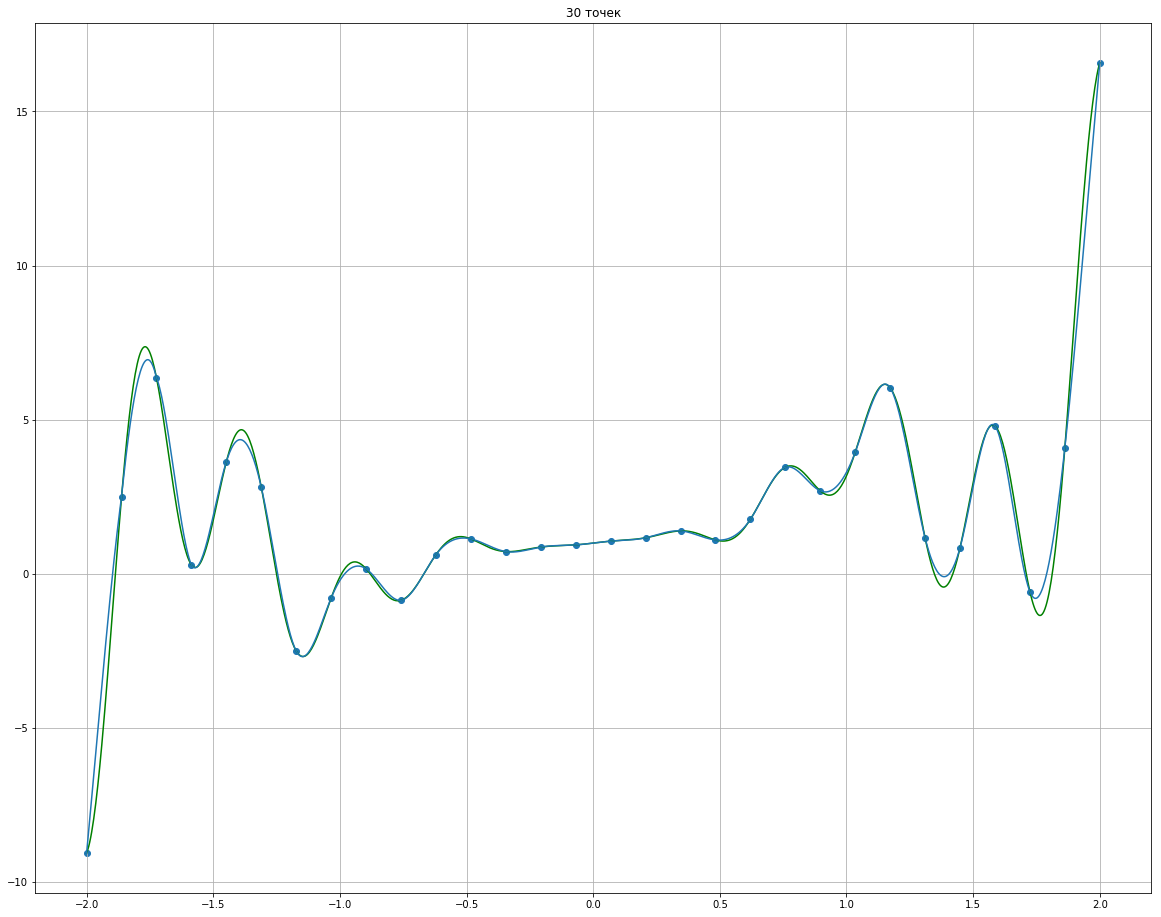

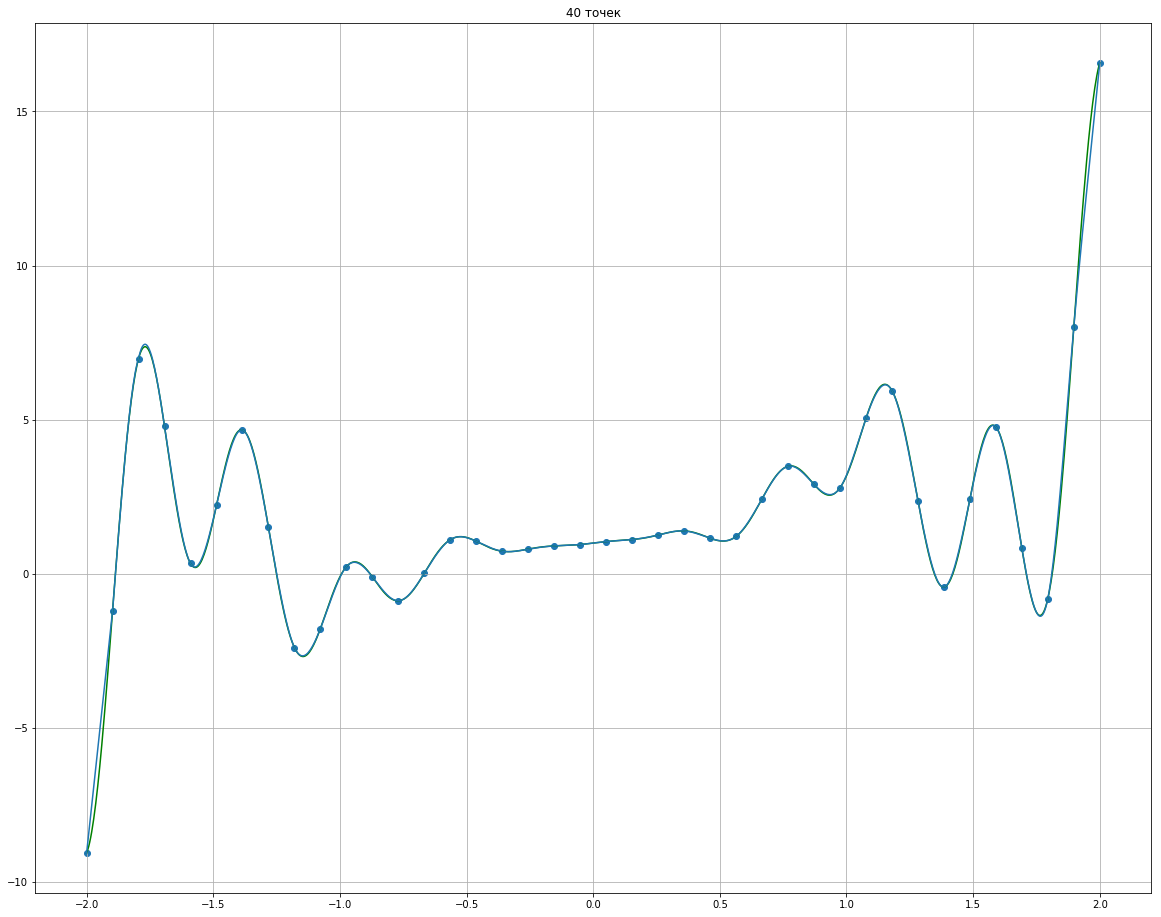

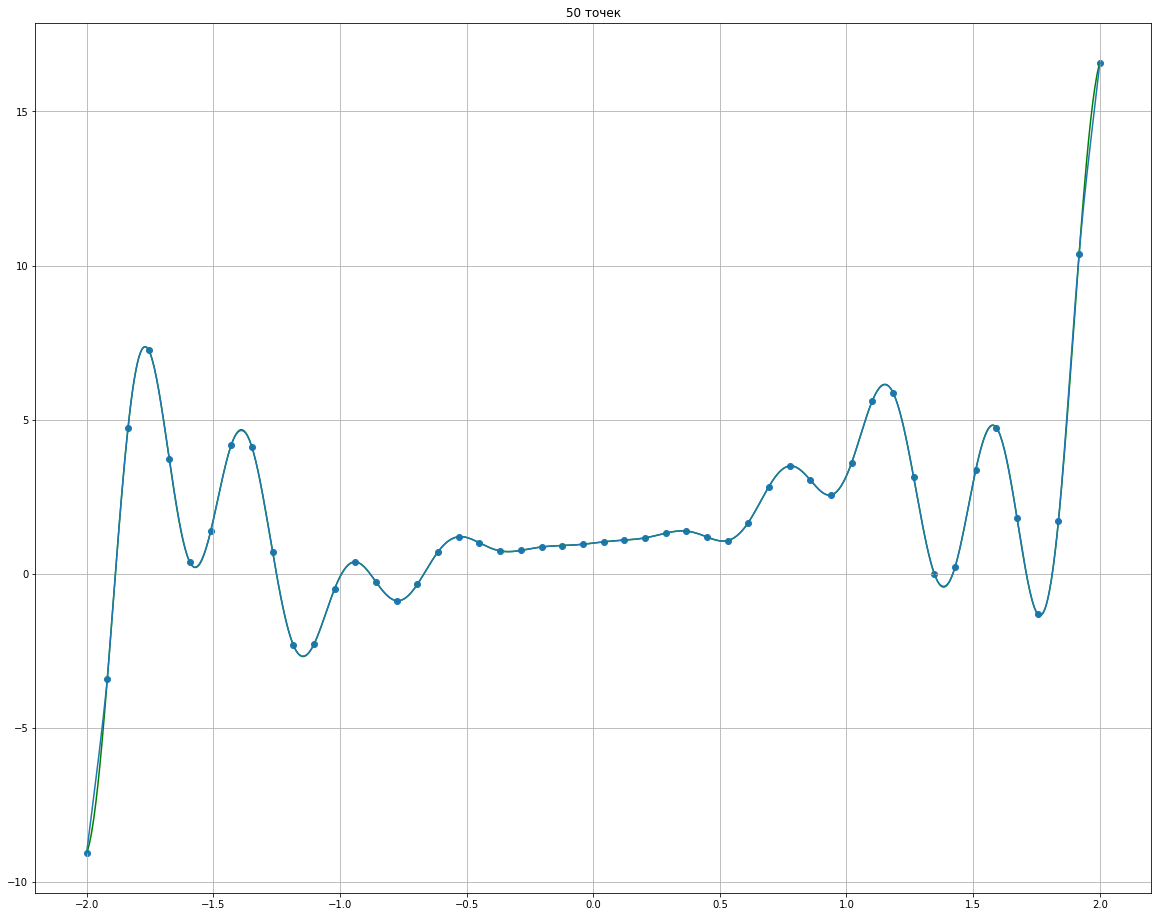

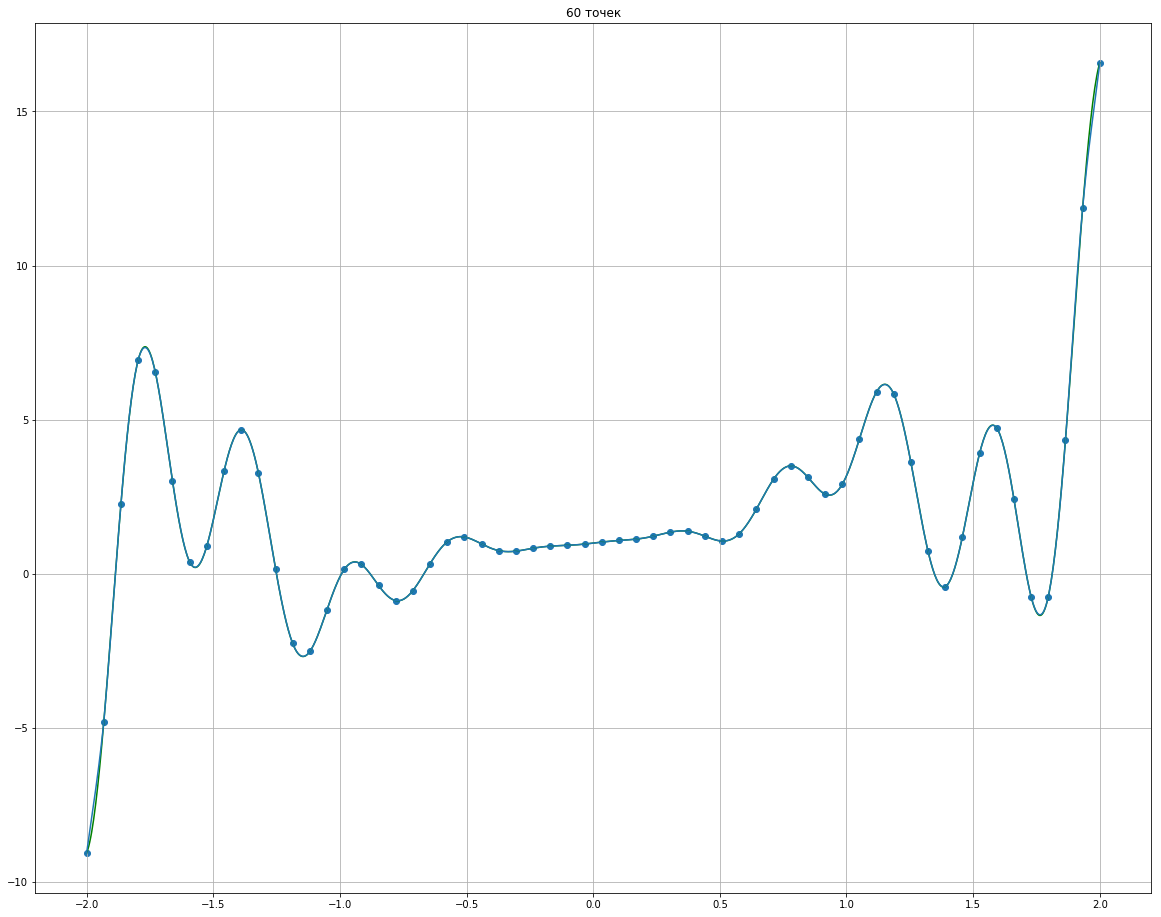

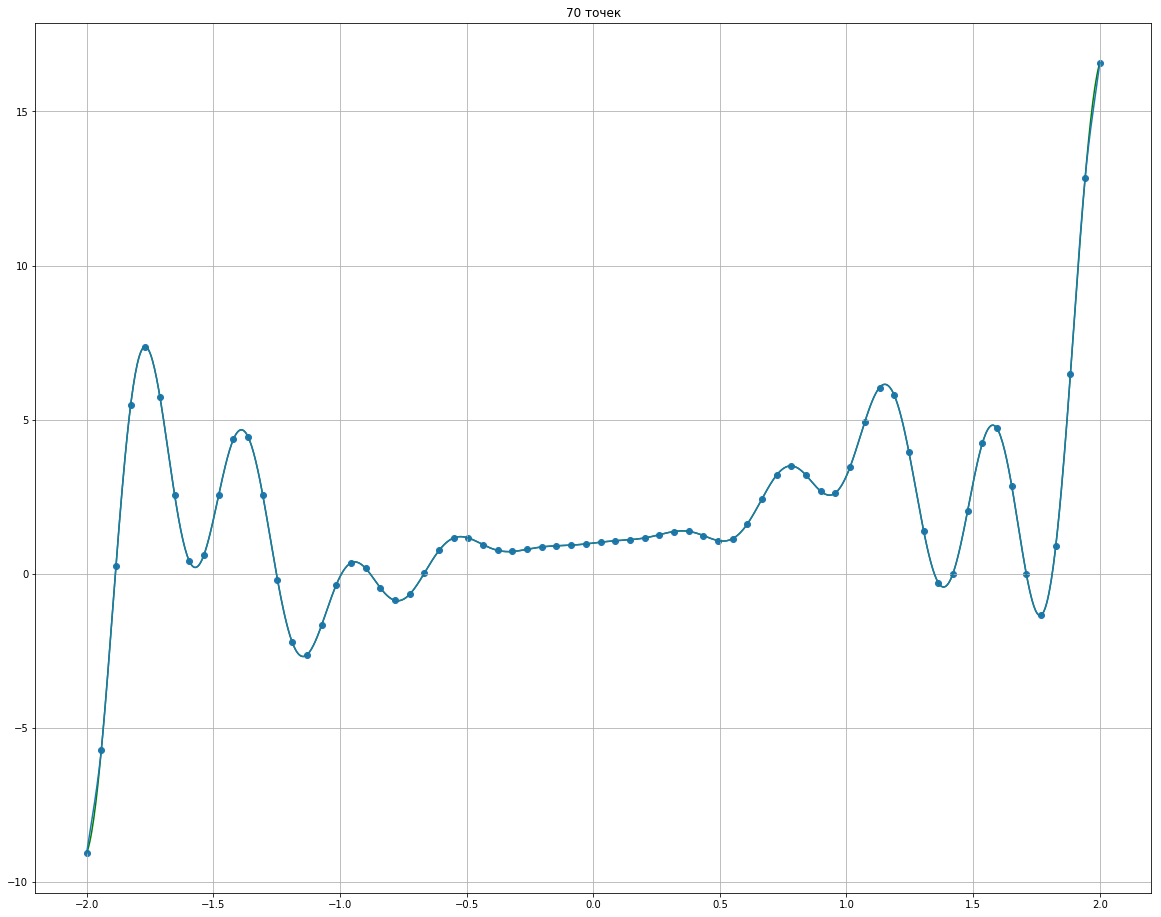

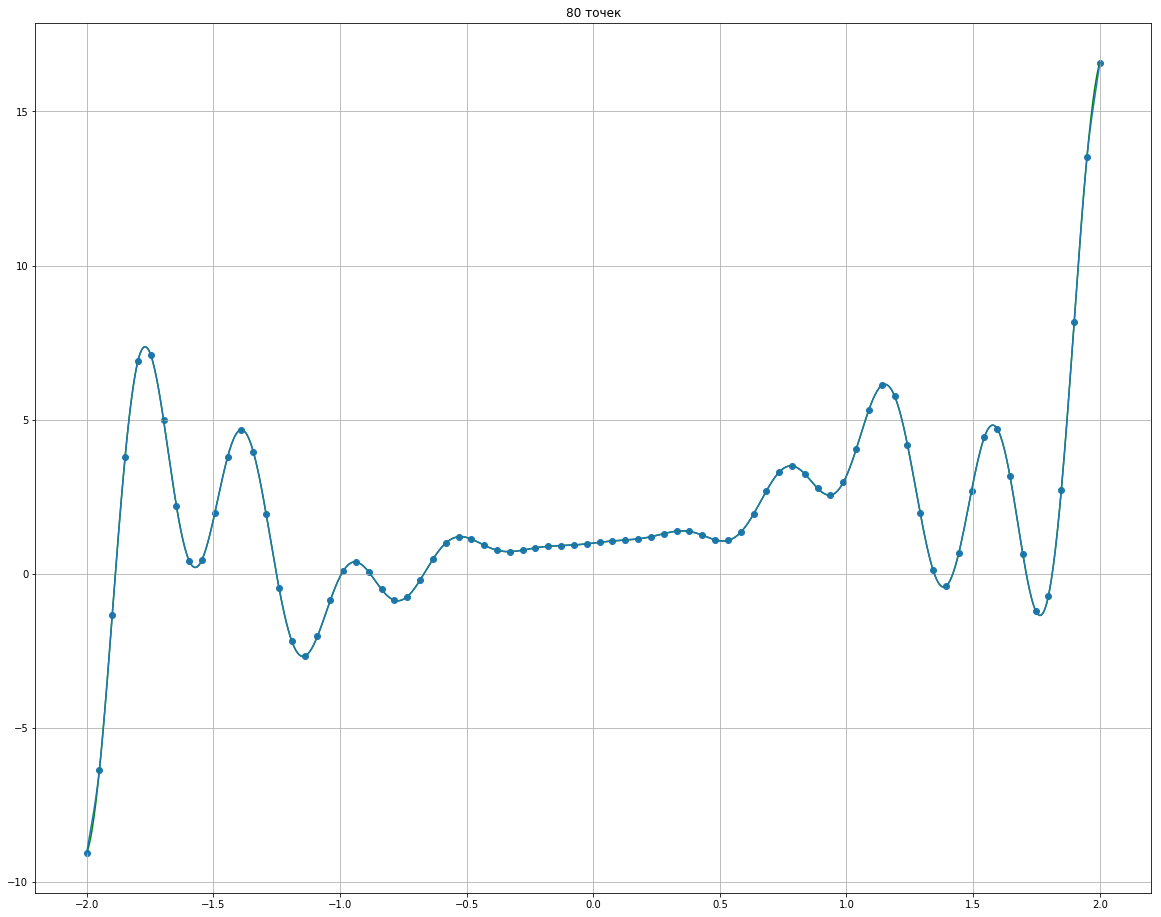

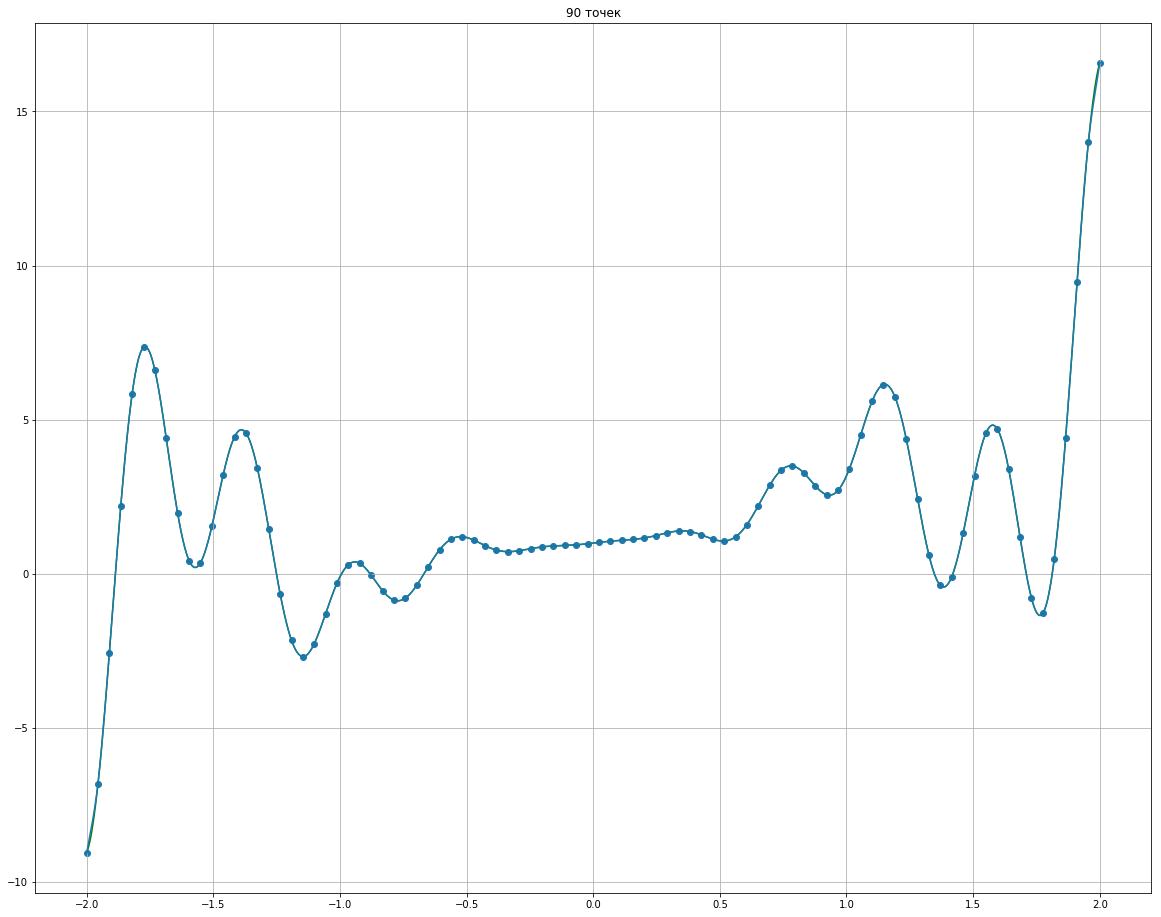

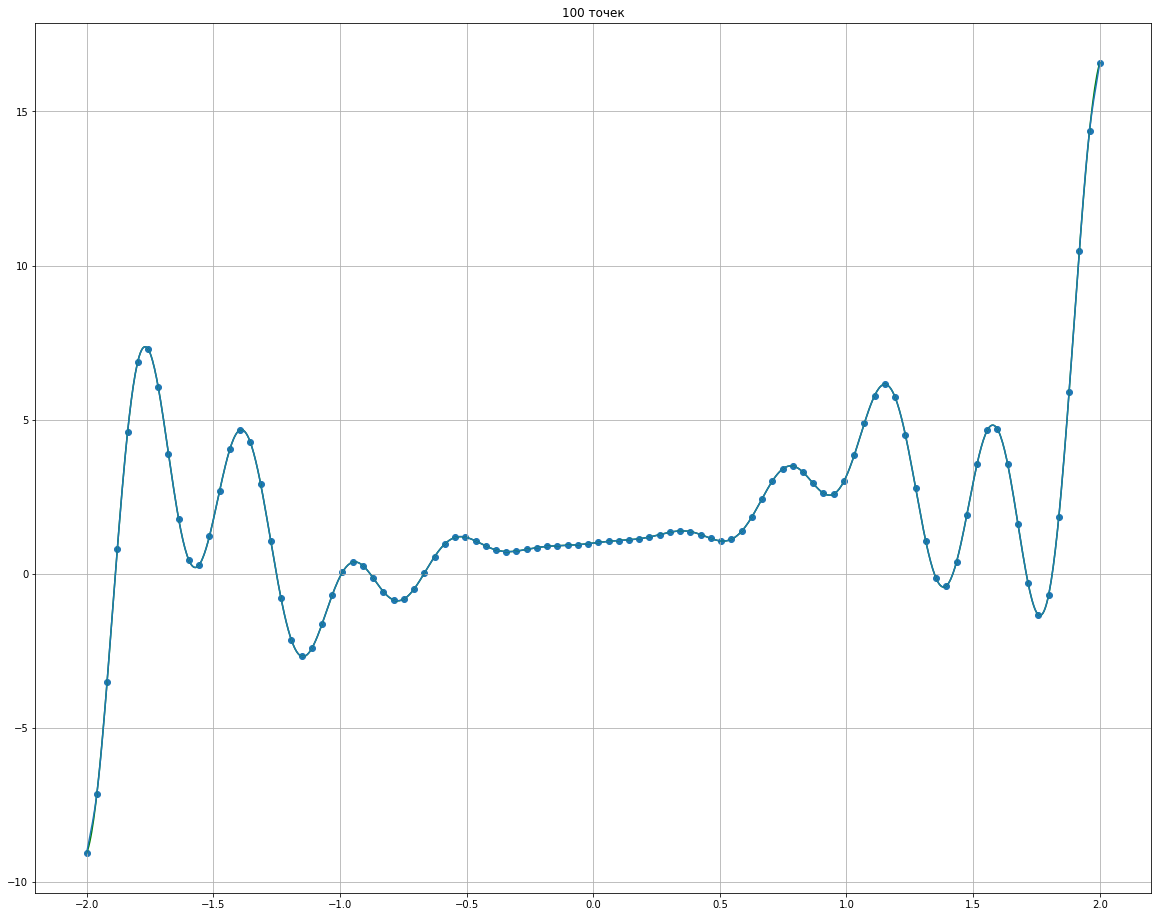

In [11]:
def cubic_interp1d(x0, x, y):
  size = len(x)
  xdiff = []
  ydiff = []
  for i in range (len(x)-1):
    xdiff.append(x[i+1]-x[i])
    ydiff.append(y[i+1]-y[i])
  Li = np.empty(size)
  Li_1 = np.empty(size-1)
  z = np.empty(size)
  Li[0] = sqrt(2*xdiff[0])
  Li_1[0] = 0.0
  B0 = 0.0
  z[0] = B0 / Li[0]
  for i in range(1, size-1, 1):
      Li_1[i] = xdiff[i-1] / Li[i-1]
      Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
      Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
      z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]
  i = size - 1
  Li_1[i-1] = xdiff[-1] / Li[i-1]
  Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
  Bi = 0.0
  z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]
  i = size-1
  z[i] = z[i] / Li[i]
  for i in range(size-2, -1, -1):
      z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]
  index = x.searchsorted(x0)
  np.clip(index, 1, size-1, index)
  xi1, xi0 = x[index], x[index-1]
  yi1, yi0 = y[index], y[index-1]
  zi1, zi0 = z[index], z[index-1]
  hi1 = xi1 - xi0
  f0 = zi0/(6*hi1)*(xi1-x0)**3 + zi1/(6*hi1)*(x0-xi0)**3 + \
    (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
  return f0

#10i узлов
for i in range (0, 10, 1):
  start_time=time.time()
  x = np.linspace(-2, 2, 10*(i+1))
  y = f_np(x)
  f0 = cubic_interp1d(rr, x, y)
  table[i][6]=(time.time() - start_time)*10e3
  
  plt.figure(figsize=(20,16))
  plt.title(str(10*(i+1)) + ' точек')
  plt.scatter(x, y)
  plt.plot(rr, f_np(rr), color='green')
  plt.plot(rr, f0)
  plt.grid()
  plt.show()
  
  func = f_np(rr)
  table[i][5]=max(list(map(lambda i : abs(func[i]-f0[i]), range (0, rr.size, 1))))

Вывод: Чем больше узлов, тем лучше приближение

### Пункт 4: Оценка

In [12]:
import pandas as pd

text = np.empty((10, 4), dtype=object)
for i in range(0, 10, 1):
  text[i][0] = str(table[i][0])
  text[i][1] = "{:.0e}".format(table[i][1]) + '/' + str(round(table[i][2])) + 'мс'
  text[i][2] = "{:.0e}".format(table[i][3]) + '/' + str(round(table[i][4])) + 'мс'
  text[i][3] = "{:.0e}".format(table[i][5]) + '/' + str(round(table[i][6])) + 'мс'
collabel=("N", "Многочлен Ньютона (равноотстоящие)", "Многочлен Ньютона (Чебышевские)", "Сплайн")
pd.DataFrame(data=text, columns=collabel)

,N,Многочлен Ньютона (равноотстоящие),Многочлен Ньютона (Чебышевские),Сплайн
0,10,7e+00/10мс,7e+00/0мс,1e+01/10мс
1,20,2e+03/10мс,3e+00/10мс,2e+00/20мс
2,30,7e+04/20мс,3e-01/20мс,2e+00/20мс
3,40,5e+03/30мс,9e-02/20мс,1e+00/30мс
4,50,1e+01/40мс,8e+00/30мс,7e-01/20мс
5,60,4e+01/40мс,4e+02/30мс,5e-01/20мс
6,70,3e+02/80мс,4e+03/30мс,4e-01/20мс
7,80,9e+04/70мс,9e+07/50мс,3e-01/30мс
8,90,2e+09/80мс,1e+12/90мс,2e-01/30мс
9,100,2e+13/150мс,6e+17/100мс,2e-01/30мс


Вывод: Интерполирование сплайнами наиболее точно для различного количества узлов, но медленнее